# クラスタリング

### k-means法
k-means法が最も適しているのは、球状のクラスタリング
1. クラスタの中心の初期値として、データ点からk個のセントロイドをランダムに選び出す。
2. 各データ点を最も近いセントロイド$\mu^{j}$に割り当てる。
3. セントロイドに割り当てられたデータ点を中心に、セントロイドを移動する。
4. クラスタの割り当てが変化しなくなるか、ユーザー定義の許容値またはイテレーションの最大回数に達するまで、手順2~3を繰り返す。

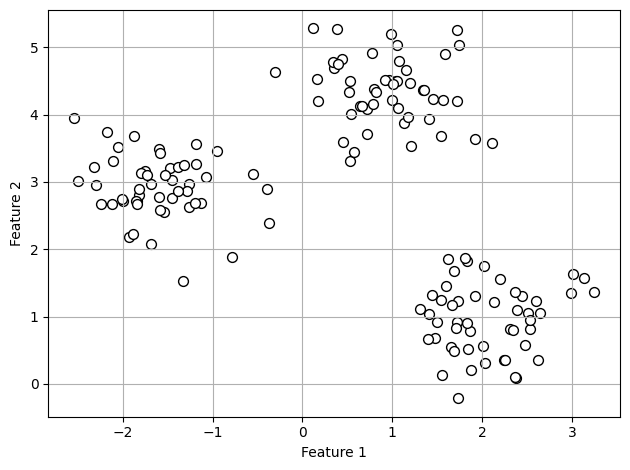

In [1]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=150, 
                  n_features=2, 
                  centers=3, 
                  cluster_std=0.5, 
                  shuffle=True, 
                  random_state=0)

import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c='white', marker='o', edgecolors='black', s=50)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid()
plt.tight_layout()
#plt.savefig('./figures/spheres.png', dpi=300)
plt.show()

In [2]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, 
            init='random', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)
y_km = km.fit_predict(X)

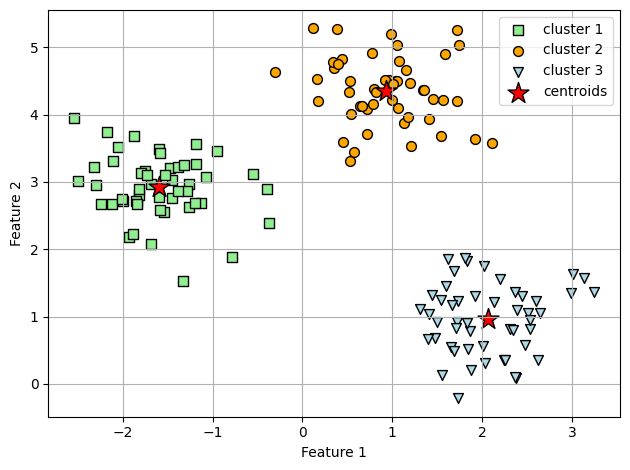

In [3]:
plt.scatter(X[y_km == 0, 0],
            X[y_km == 0, 1],
            s=50,
            c='lightgreen',
            edgecolors='black',
            marker='s',
            label='cluster 1')
plt.scatter(X[y_km == 1, 0],
            X[y_km == 1, 1],
            s=50,
            c='orange',
            edgecolors='black',
            marker='o',
            label='cluster 2')
plt.scatter(X[y_km == 2, 0],
            X[y_km == 2, 1],
            s=50,
            c='lightblue',
            edgecolors='black',
            marker='v',
            label='cluster 3')
plt.scatter(km.cluster_centers_[:, 0],
            km.cluster_centers_[:, 1],
            s=250,
            marker='*',
            c='red',
            edgecolors='black',
            label='centroids')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(scatterpoints=True)
plt.grid()
plt.tight_layout()
#plt.savefig('./figures/centroids.png', dpi=300)
plt.show()

### k-means++
k-means法では、初期値が不適切である場合に、クラスタリングがうまくいかなかったり、収束に時間がかかったりすることがある。対処法の1つとして、1つのデータセットで複数回実行し、最も性能の良いモデルを選択すること。  
もう一つの戦略k-means++。
1. 最初の1つ目の中心をデータの中からランダムに選ぶ
2. 各データ点 $x$ について、最も近い既存クラスタ中心との距離の2乗を計算：
3. この $D(x)^2$ を重みとして、確率的に次のクラスタ中心を選ぶ
4. k個の中心が選ばれるまで繰り返す

元のデータの中からk個選択する。そして通常のk-means（割り当て＋重心の更新）を実行する

## ソフトクラスタリング
データ点を1つ以上のクラスタに割り当てるアルゴリズム  
$J_m=\Sigma_{i=1}^n \Sigma_{j=1}^k w^{(i, j)^m} ||x^i-\mu^j||^2_2$  
k-meansのように$w^{(i, j)} \in \{0,1\}$ではなく、$w^{(i, j)} \in [0,1] $でソフトにしている。

## 最適なクラスタの個数をエルボー法で求める

In [4]:
print(f'Distortion: {km.inertia_:.2f}')

Distortion: 72.48


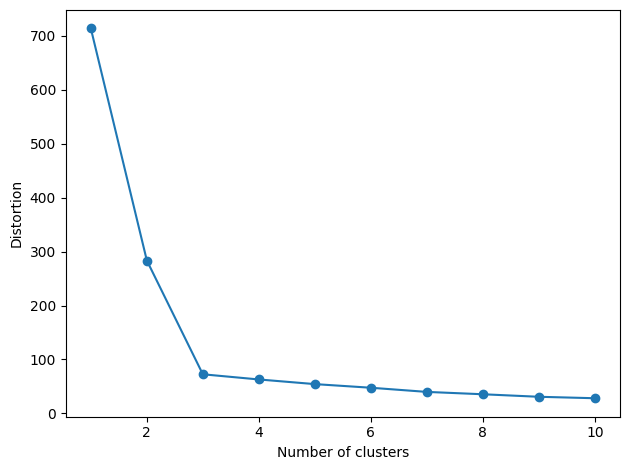

In [5]:
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
#plt.savefig('./figures/elbow.png', dpi=300)
plt.show()

## シルエット図

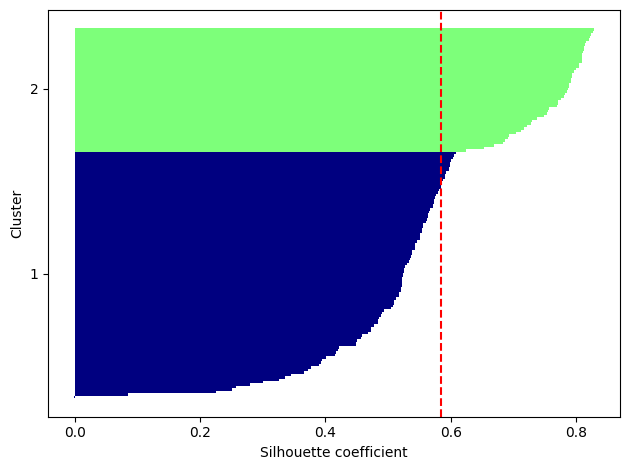

In [7]:
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples

km = KMeans(n_clusters=2, 
            init='k-means++', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)
y_km = km.fit_predict(X)

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.tight_layout()
# plt.savefig('./figures/silhouette.png', dpi=300)
plt.show()

シルエット図の長さと幅が明らかに違っていると良くないクラスタリングの可能性。